#0. DATASET CONTEXT

This dataset is cleaned from [an airline satisfaction survey](https:drive.google.com/file/d/1oKFnhKBtO_-eEYenjplsVJAzbcAOYspq/view).

The objective of this notebook is understand the distribution of the dataset, identify correlations and its strengh to be able to create a model that will predict if the customer is satisfied or not.

#1. LIBRARIES NEEDED

In [15]:
#Essentials libraries
import pandas as pd #Data manipulation
import numpy as np #Numeric operations
import plotly as pl #Interactive visualizations
import seaborn as sns #Graphs
import matplotlib.pyplot as plt #Boxplots


from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #Feature Engineering

from google.colab import files #export files


import warnings
warnings.filterwarnings('ignore') #ignore warnings
pd.set_option('display.max_columns', None) #show all columns
pd.set_option('display.max_rows', 100) #show 100 rows
sns.set_style('whitegrid') #white background
plt.rcParams['figure.figsize'] = (12, 6) #all figures with the same size

print('✅ Libraries loaded')

✅ Libraries loaded


#2. DATASET LOAD

In [16]:
#Dataset load
df = pd.read_csv('airline-predict-g4-cleaning.csv')
print('✅ Dataset loaded')

✅ Dataset loaded


#3. DATASET COPY

In [18]:
#In case any change is necessary
df_copy = df.copy()
print('✅ Copy done')

✅ Copy done


#4. DATA OVERVIEW


In [21]:
print('📋 DATASET INFORMATION')
first_rows = df_copy.head()
last_rows = df_copy.tail()
general_info = df_copy.info()

display(first_rows, last_rows, general_info)

📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink   

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_label,Customer_label,Type_Travel_label,Satisfaction_label,Class_Ordinal
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,2.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,0,0,1,2.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,2.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0,1,2.0


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_label,Customer_label,Type_Travel_label,Satisfaction_label,Class_Ordinal
103589,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,0,1,0,0,0.0
103590,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied,1,0,0,1,2.0
103591,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,1,1,0,0,2.0
103592,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,0,1,0,0,0.0
103593,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied,1,0,0,0,2.0


None

In [24]:
print('📊 DESCRIPTIVE STATISTICS - NUMERICAL')
df_copy.describe()

📊 DESCRIPTIVE STATISTICS - NUMERICAL


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_label,Customer_label,Type_Travel_label,Satisfaction_label,Class_Ordinal
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.492480,0.182752,0.310143,0.433394,1.028380
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.499946,0.386465,0.462554,0.495546,0.962868
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [23]:
print('📊 DESCRIPTIVE STATISTICS - CATEGORICAL')
df_copy.describe(include=object)

📊 DESCRIPTIVE STATISTICS - CATEGORICAL


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


In [28]:
#Unique values are identified
print('📊 CATEGORICAL - [UNIQUE VALUES]')
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in categorical_cols:
    print(col, " - ", df_copy[col].unique())

📊 CATEGORICAL - [UNIQUE VALUES]
Gender  -  ['Male' 'Female']
Customer Type  -  ['Loyal Customer' 'disloyal Customer']
Type of Travel  -  ['Personal Travel' 'Business travel']
Class  -  ['Eco Plus' 'Business' 'Eco']
satisfaction  -  ['neutral or dissatisfied' 'satisfied']


#5. UNIVARIABLE ANALYSIS

##5.1. BARPLOTS


These could be piecharts as well because they have few categories.

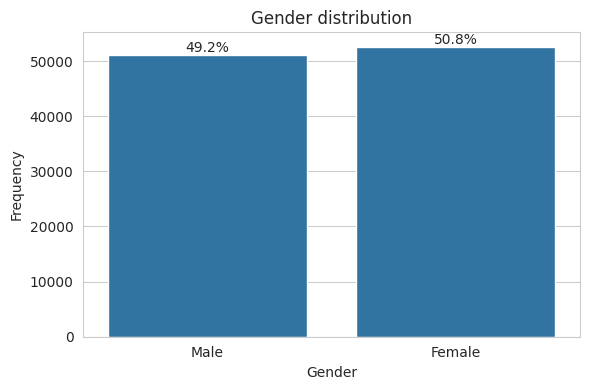

In [37]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_copy, x='Gender')

# Percentage
total = len(df_copy)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom')

plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

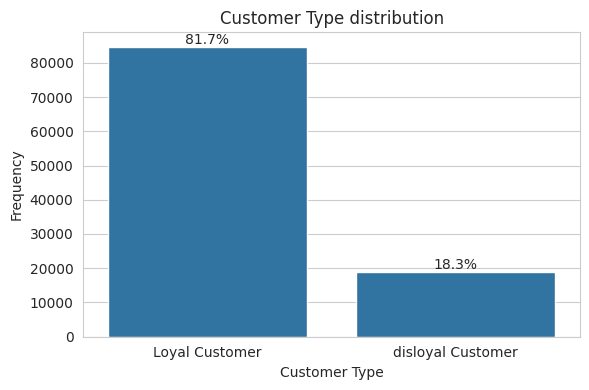

In [38]:
#Barplot of Customer Type
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_copy, x='Customer Type')

# Percentage
total = len(df_copy)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom')

plt.title('Customer Type distribution')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

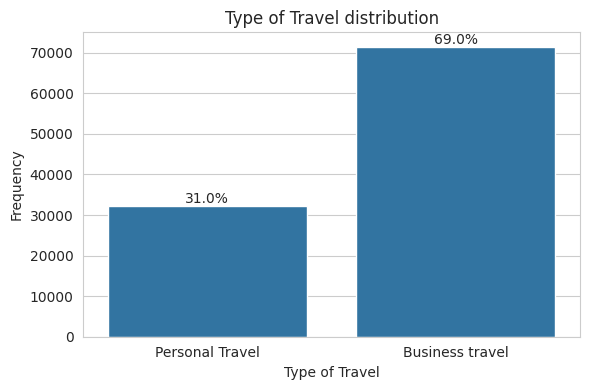

In [39]:
#Barplot of Type of Travel
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_copy, x='Type of Travel')

# Percentage
total = len(df_copy)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom')

plt.title('Type of Travel distribution')
plt.xlabel('Type of Travel')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

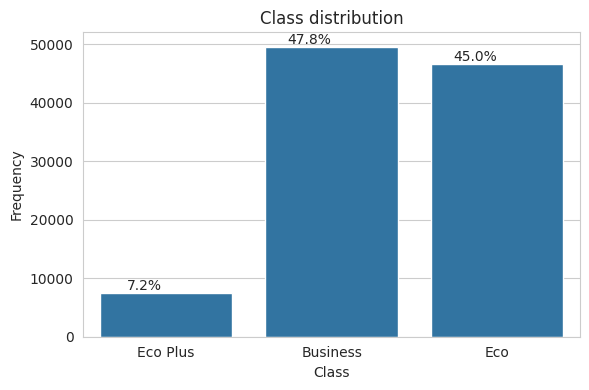

In [40]:
#Barplot of Class
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_copy, x='Class')

# Percentage
total = len(df_copy)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 3, count),
                ha='center', va='bottom')

plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

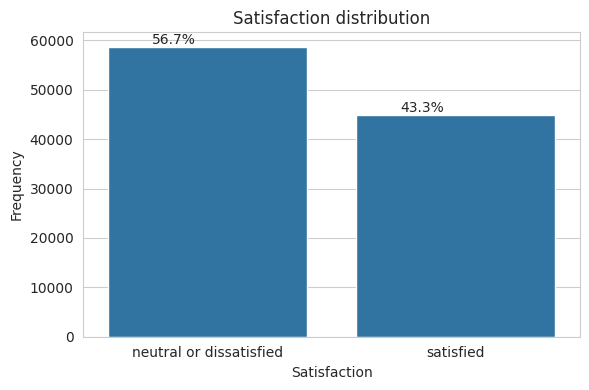

In [41]:
#Barplot of satisfaction
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_copy, x='satisfaction')

# Percentage
total = len(df_copy)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 3, count),
                ha='center', va='bottom')

plt.title('Satisfaction distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

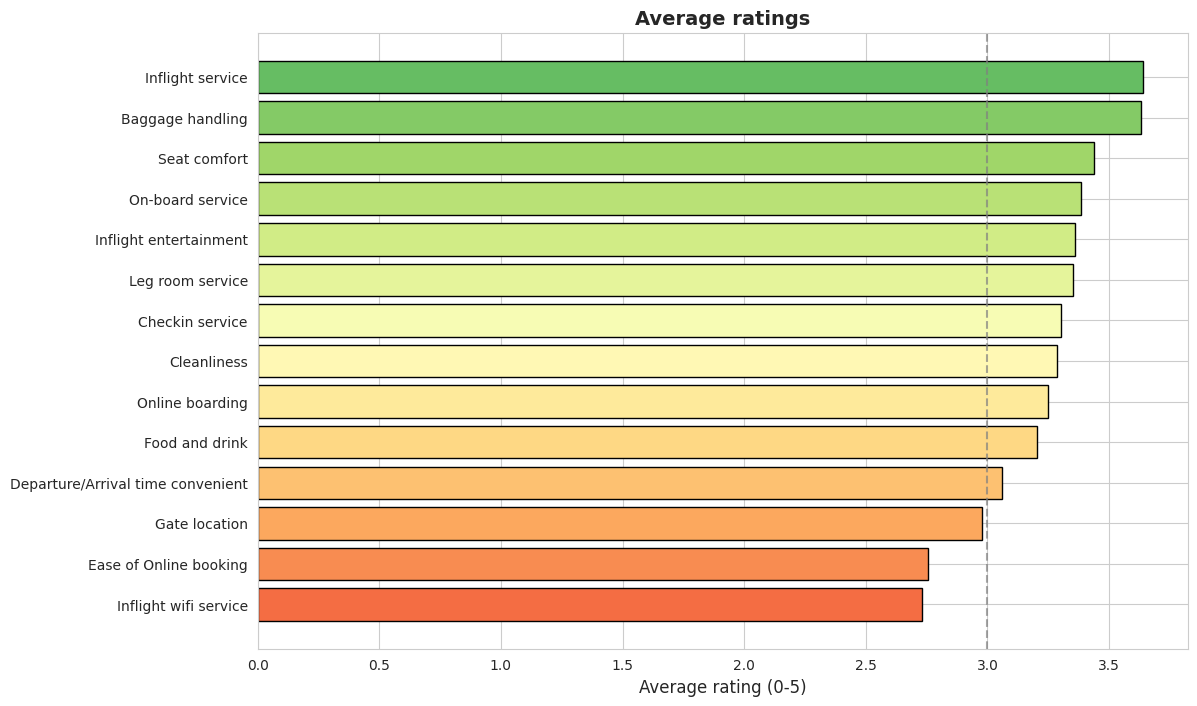

In [42]:
# Survey (ratings 0-5)
service_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service',
                'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

# Means per service
service_means = df_copy[service_cols].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(service_means)))
bars = plt.barh(service_means.index, service_means.values, color=colors, edgecolor='black')
plt.xlabel('Average rating (0-5)', fontsize=12)
plt.title('Average ratings', fontsize=14, fontweight='bold')
plt.axvline(x=3, color='gray', linestyle='--', alpha=0.7, label='Neutral (3)')

##5.2. HISTOGRAMS

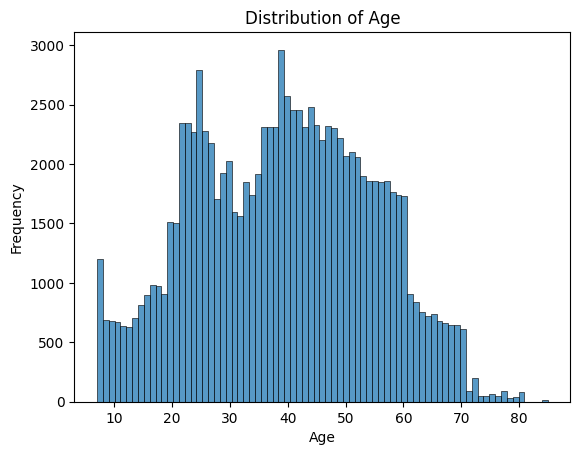

In [11]:
sns.histplot(data=df_copy, x='Age')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

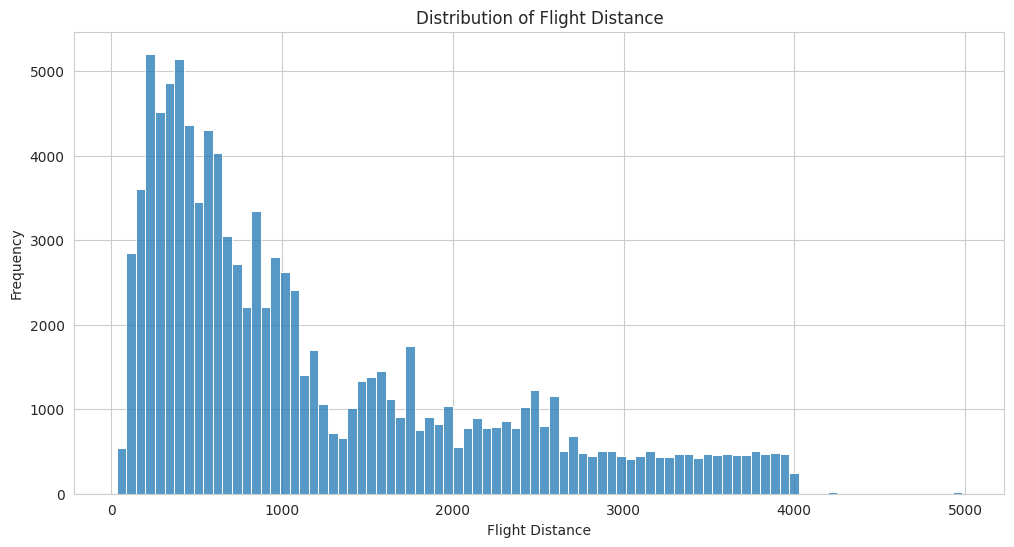

In [35]:
sns.histplot(data=df_copy, x='Flight Distance')

plt.title('Distribution of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

#6. BIVARIABLE ANALYSIS

##6.1. BARPLOTS

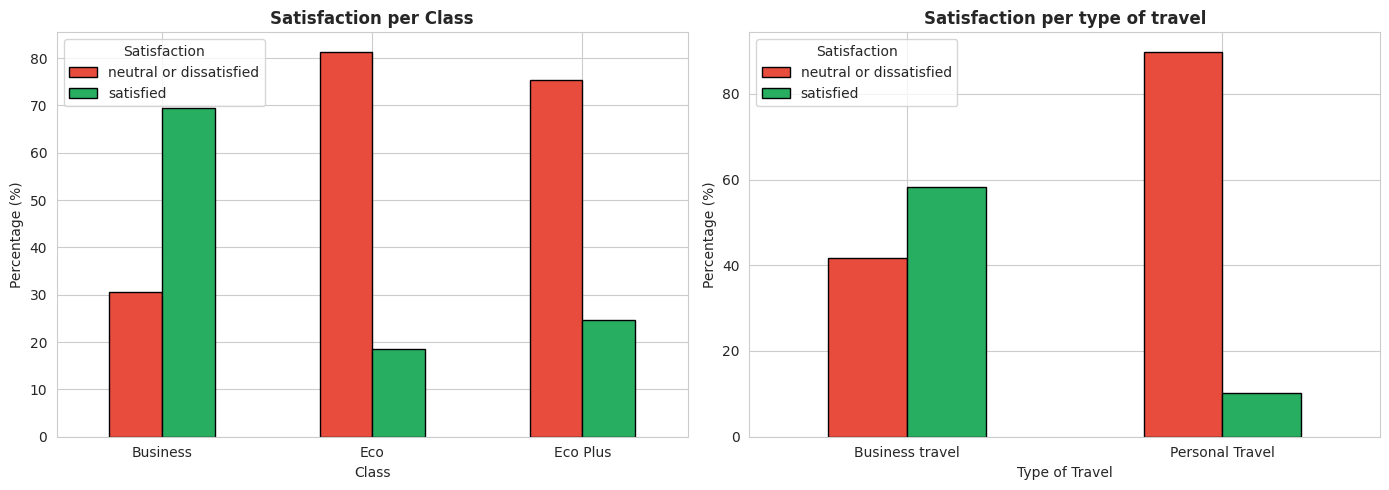

In [51]:
# Satisfaction per class and type of travel
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Per Clase
class_sat = pd.crosstab(df['Class'], df['satisfaction'], normalize='index') * 100
class_sat.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#27ae60'], edgecolor='black')
axes[0].set_title('Satisfaction per Class', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Percentage (%)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Satisfaction')

# Per Type of Travel
travel_sat = pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize='index') * 100
travel_sat.plot(kind='bar', ax=axes[1], color=['#e74c3c', '#27ae60'], edgecolor='black')
axes[1].set_title('Satisfaction per type of travel', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage (%)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Satisfaction')

plt.tight_layout()
plt.show()


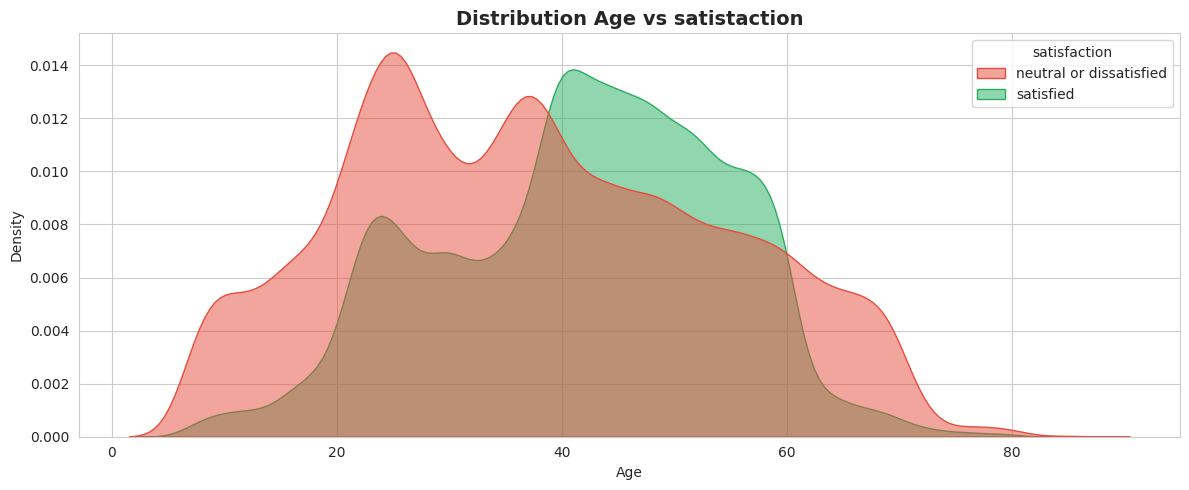

In [52]:
# Age vs Satisfaction
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='Age', hue='satisfaction', fill=True, alpha=0.5, palette=['#e74c3c', '#27ae60'])
plt.title('Distribution Age vs satistaction', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

##6.2. HEATMAP

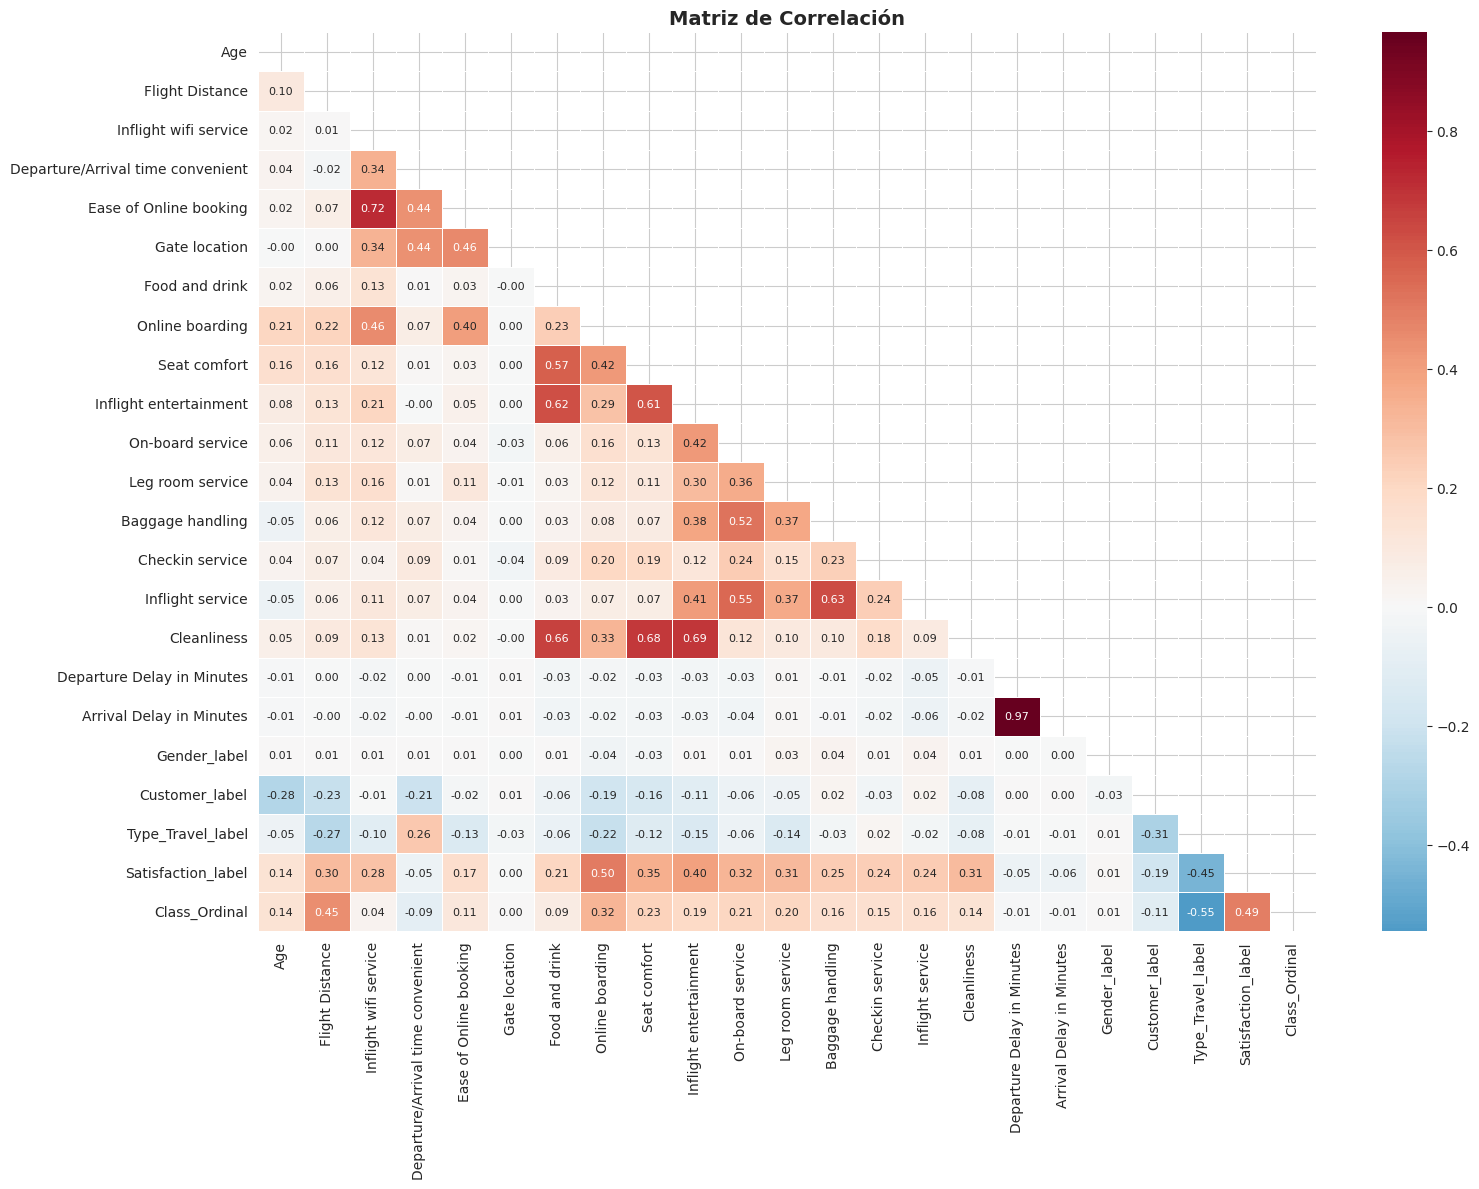

In [44]:
# Correlation between numeric variables but ID
numeric_for_corr = df_copy.select_dtypes(include=[np.number]).drop(columns=['Unnamed: 0', 'id'], errors='ignore')

plt.figure(figsize=(16, 12))
correlation_matrix = numeric_for_corr.corr()

# Triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdBu_r', center=0, linewidths=0.5,
            annot_kws={'size': 8})
plt.title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [46]:
# Top correlations (NO diagonal)
print('🔗 TOP 10 STRONGER CORRELATIONS')
print('=' * 50)

# Correlations without diagonal
corr_pairs = []
cols = correlation_matrix.columns
for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        if i < j:
            corr_pairs.append({
                'Variable 1': col1,
                'Variable 2': col2,
                'Correlation': correlation_matrix.loc[col1, col2]
            })

corr_df = pd.DataFrame(corr_pairs)
corr_df['Abs_Corr'] = corr_df['Correlation'].abs()
corr_df.nlargest(10, 'Abs_Corr')[['Variable 1', 'Variable 2', 'Correlation']]

🔗 TOP 10 STRONGER CORRELATIONS


,Variable 1,Variable 2,Correlation
232,Departure Delay in Minutes,Arrival Delay in Minutes,0.965481
44,Inflight wifi service,Ease of Online booking,0.715848
167,Inflight entertainment,Cleanliness,0.691735
154,Seat comfort,Cleanliness,0.678478
125,Food and drink,Cleanliness,0.657648
199,Baggage handling,Inflight service,0.628944
119,Food and drink,Inflight entertainment,0.622374
148,Seat comfort,Inflight entertainment,0.610614
118,Food and drink,Seat comfort,0.574561
178,On-board service,Inflight service,0.550725


#7. CONCLUSIONS

Important variables for modeling:
1. **Online boarding** - High correlation with satisfaction
2. **Inflight entertainment**
3. **Class** - Business class has higher satisfaction
4. **Type of Travel** - Business travel has higher satisfaction
5. **Customer Type** - Loyal customers has more satisfaction